<a href="https://colab.research.google.com/github/Dr-Mamiz/Projects-Data-Analysis/blob/main/Covid_19_Real_project_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project we use Python, a tiny data set sent by our client related to the Covid-19 pandemic is taken and analyzed in a very Easy To Understand (ETU) language. 

We start by cleaning our data. Tasks during this section include:
- Drop NaN values from DataFrame
- visualization

Once we have cleaned up our data a bit, we move the data exploration section. In this section we explore, we  analyze and answer question
# **TASK** 

-  Q. 1) Show the number of Confirmed, Deaths and Recovered cases in each Region.Also:
-  Finding Pearson's Correlation Coefficient (Total case Confirmed VS Deaths)
-  Finding Pearson's Correlation Coefficient (Total case Confirmed VS Recovered)
-  Mean value of the column 'Deaths'
-  Mean value of the column 'Recovered'
-  Q. 2) Remove all the records where the Confirmed Cases is Less Than 10.
-  Q. 3) In which Region, maximum number of Confirmed cases were recorded ?
-  - Visualization.
-  Q. 4) In which Region, minimum number of Deaths cases were recorded ?
-  Q. 5) How many Confirmed, Deaths & Recovered cases were reported from USA till 29 April 2020 ?
-  Q. 6-A ) Sort the entire data wrt No. of Confirmed cases in ascending order.
-  Q. 6-B ) Sort the entire data wrt No. of Recovered cases in descending order.


# Dataset: 
https://drive.google.com/file/d/1BTG4tZUmiTKwu1E7o_UmqAtMrguNrOoh/view


In [1]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset
data_covid= pd.read_csv('/content/4. covid_19_data.csv')

In [3]:
# Copy of our dataset
df=data_covid.copy()

In [4]:
df.head(5)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


Shape of our dataset (df)

In [5]:
df.shape


(321, 6)

In [6]:
# Detecting the missing values in our dataframe.
df.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

In [13]:

#The no of non-null values of each column
df.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

As we can see that the column 'State' has more than 50% of missing values so in our situation we'll just remove it from our dataframe.

In [14]:
# Removing the column 'State'
df = df.drop('State', 1)


In [15]:
# Checking our new dataframe
df.head(3)

,Date,Region,Confirmed,Deaths,Recovered
0,4/29/2020,Afghanistan,1939,60,252
1,4/29/2020,Albania,766,30,455
2,4/29/2020,Algeria,3848,444,1702


In [16]:
df.isnull().sum()

Date         0
Region       0
Confirmed    0
Deaths       0
Recovered    0
dtype: int64

#Analysing our dataset

In [17]:
df.dtypes

Date         object
Region       object
Confirmed     int64
Deaths        int64
Recovered     int64
dtype: object

#                            **TASK**

# Q. 1) Show the number of Confirmed, Deaths and Recovered cases in each Region.



In [22]:

df.groupby('Region').sum()

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
...,...,...,...
West Bank and Gaza,344,2,71
Western Sahara,6,0,5
Yemen,6,0,1


In [27]:
#Finding Pearson's Correlation Coefficient (Total case Confirmed VS Deaths)
df['Confirmed'].corr(df['Deaths'])

0.9072936356094397

A very high correlation between relative Total case Confirmed VS Deaths

In [36]:
#Finding Pearson's Correlation Coefficient (Total case Confirmed VS Recovered)
df['Confirmed'].corr(df['Recovered'])

0.5960078800637865

The correlation between Total case Confirmed & Recovered considered moderately correlated.

In [44]:
# Mean value of the column 'Deaths'
df['Deaths'].mean()


709.1526479750779

In [45]:
# Mean value of the column 'Recovered'
df['Recovered'].mean()

3030.277258566978

As we can see that the mean of Recovered much higher than the mean of Deaths ( almoset 4.3 times more)

#Q. 2) Remove all the records where the Confirmed Cases is Less Than 10.

In [48]:
# Instruction (Removing unwanted records)

#Remove all the records where the Confirmed Cases is Less Than 10
df[df['Confirmed']<10]

,Date,Region,Confirmed,Deaths,Recovered
18,4/29/2020,Bhutan,7,0,5
98,4/29/2020,MS Zaandam,9,2,0
105,4/29/2020,Mauritania,8,1,6
126,4/29/2020,Papua New Guinea,8,0,0
140,4/29/2020,Sao Tome and Principe,8,0,4
177,4/29/2020,Western Sahara,6,0,5
178,4/29/2020,Yemen,6,0,1
184,4/29/2020,UK,3,0,3
192,4/29/2020,Netherlands,5,0,0
194,4/29/2020,UK,6,1,3


#Q. 3) In which Region, maximum number of Confirmed cases were recorded ?

In [53]:
# Finding the region where the MAX Confirmed cases were recorded
df.groupby(['Region'])['Confirmed'].max().sort_values(ascending= False).head(10)

Region
US         299691
Spain      236899
Italy      203591
UK         165221
France     165093
Germany    161539
Turkey     117589
Russia      99399
Iran        93657
Brazil      79685
Name: Confirmed, dtype: int64

the first three regions where the MAX Confirmed cases were recorded are: USA with 299691 confirmations then Spain and Italy with 236899 and 203591.

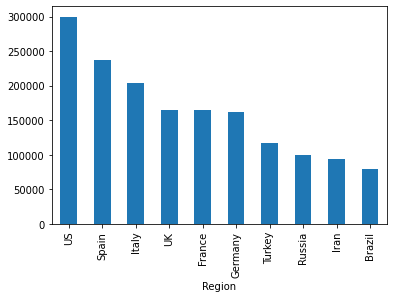

In [54]:
# Visualization.
df.groupby(['Region'])['Confirmed'].max().sort_values(ascending= False).head(10).plot(kind='bar')

Here a Visualization 'bar' for the 10 MAX records Covid-19 by region.

#-  Q. 4) In which Region, minimum number of Deaths cases were recorded ?


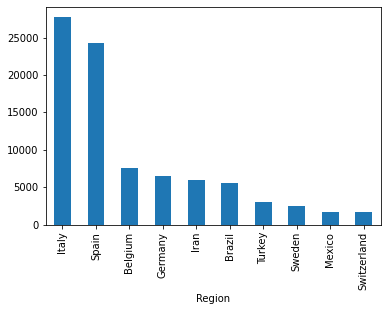

In [60]:
df.groupby(['Region'])['Deaths'].min().sort_values(ascending= False).head(10).plot(kind='bar')

Switzerland has the minimum death caused by the Covid-19.

# Q. 5) How many Confirmed, Deaths & Recovered cases were reported from USA till 29 April 2020 ?

since 29 April 2020 is only one date that we have in our dataset, so we have just to extract the numbers needed for USA

In [76]:
df[df.Region == 'US'].sum()

Date         4/29/20204/29/20204/29/20204/29/20204/29/20204...
Region       USUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUS...
Confirmed                                              1039909
Deaths                                                   60967
Recovered                                               120720
dtype: object

In [72]:
df[df['Region'].isin(['US'])].sum()

Date         4/29/20204/29/20204/29/20204/29/20204/29/20204...
Region       USUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUS...
Confirmed                                              1039909
Deaths                                                   60967
Recovered                                               120720
dtype: object

- Confirmed cases in USA : 1039909
- Deaths in USA :  60967
- Recovered  in USA : 120720

# Q. 6-A ) Sort the entire data wrt No. of Confirmed cases in ascending order.

In [89]:
#Sort the entire data df wrt No. of Confirmed cases in ascending order.
df.sort_values(by = ['Confirmed'], ascending= True) 

,Date,Region,Confirmed,Deaths,Recovered
285,4/29/2020,US,0,0,120720
284,4/29/2020,Canada,0,0,20327
203,4/29/2020,Canada,0,1,0
305,4/29/2020,Mainland China,1,0,1
289,4/29/2020,France,1,0,0
...,...,...,...,...,...
57,4/29/2020,France,165093,24087,48228
168,4/29/2020,UK,165221,26097,0
80,4/29/2020,Italy,203591,27682,71252
153,4/29/2020,Spain,236899,24275,132929


We can also asort the dataframe with duplicated Region.

In [87]:
# Creation df1 withoun duplicated region
df1=df.groupby('Region').sum()

In [88]:
# Sort the entire data df1 wrt No. of Confirmed cases in ascending order.
df1.sort_values(by = ['Confirmed'], ascending= True) 

,Confirmed,Deaths,Recovered
Region,,,
Yemen,6,0,1
Western Sahara,6,0,5
Bhutan,7,0,5
Papua New Guinea,8,0,0
Sao Tome and Principe,8,0,4
...,...,...,...
UK,166441,26166,857
France,166543,24121,49118
Italy,203591,27682,71252


##Q. 6-B ) Sort the entire data wrt No. of Recovered cases in descending order.

In [ ]:
# We use df1 to Sort the entire data wrt No. of Recovered cases in descending order.

In [91]:
df1.sort_values(by = ['Recovered'], ascending= False) 

,Confirmed,Deaths,Recovered
Region,,,
Spain,236899,24275,132929
US,1039909,60967,120720
Germany,161539,6467,120400
Mainland China,82862,4633,77610
Iran,93657,5957,73791
...,...,...,...
Cabo Verde,114,1,2
Yemen,6,0,1
South Sudan,34,0,0
